R0 is 6.3


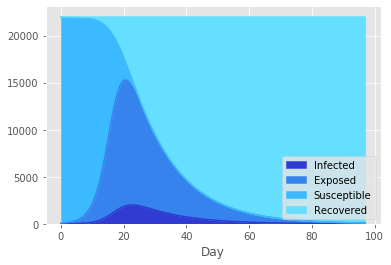

In [7]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# SEIR MODEL - DIFFERENTIAL EQUATIONS
# The SEIR model adds an “Exposed” state for individuals that have contracted the disease but are not yet
# infectious. This uses the fact that there is an incubation stage of infection that lasts approx. 6 days.
# The model assumes people carry lifelong immunity to a disease upon recovery, which hasn't been disproven
# for COVID-19.
def comp(state, t, N, beta, gamma, sigma):
    S, E, I, R = state
    dSdt = -(beta * S * I)/N # Change in susceptible population over time
    dEdt = (beta * S * I)/N - sigma * E # Change in exposed population over time
    dIdt = sigma * E - gamma * I # Change in infectious population over time
    dRdt = gamma * I # Change in recovered population over time
    return dSdt, dEdt, dIdt, dRdt

# BETA => effective_contact_rate
# GAMMA => recovery_rate
# SIGMA => incubation_period

transmission_rate = 0.09
contact_rate = 5
days_to_recover = 14
effective_contact_rate = transmission_rate * contact_rate
recovery_rate = 1/days_to_recover
mortality_rate = 0.002 # for 20-29 year olds
incubation_period = 5.1 # incubation parameter

print("R0 is", effective_contact_rate / recovery_rate)

# Starting UVA student population (rough numbers)
total_pop = 22000
recovered = 50 # complete guess, not sure of number
infected = 5 # complete guess
exposed = 50 # complete guess (those who arrive exposed in the last ~6 days)
susceptible = total_pop - infected - recovered - exposed 

days = range(0, 98)

# Computation
calc = odeint(comp, [susceptible, exposed, infected, recovered], days, 
             args=(total_pop, incubation_period, effective_contact_rate, recovery_rate))
S, E, I, R = calc.T

# DataFrame
df = pd.DataFrame({'Susceptible': S, 'Exposed': E, 'Infected': I, 'Recovered': R, 'Day': days})
plt.style.use('ggplot')
df.plot(x='Day',
        y=['Infected', 'Exposed', 'Susceptible', 'Recovered'],
        color=['#303bd1', '#3783ed', '#3bbaff', '#66deff'],
        kind='area',
        stacked=True)

Generally, a lower R0 is best. For example, an R0 of 1.0 simply means one person passes it to another, who passes it to another, etc. 
This simulation has an abnormally high R0, but the CDC reported an R0 of 5.7 in Wuhan, China (https://wwwnc.cdc.gov/eid/article/26/7/20-0282_article).
It should be noted that the amount of time for recovery from COVID-19 is approximately 2 weeks, or 14 days. However, this number increases substantially to 3-6 weeks if the patient has any severe pre-existing conditions.

The CDC also mentions (linked below) there are approximately ~6 days between exposure and symptom onset.
https://www.cdc.gov/coronavirus/2019-ncov/hcp/planning-scenarios.html